In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Column Names:   
**unit number, time in cycles, operational setting 1, operational setting 2, operational setting 3, sensor measurement 1, sensor measurement 2 ... 26) sensor measurement 26**

In [2]:
col_names = ['unit_num', 'time_cycles', 'op_setting_1', 'op_setting_2', 'op_setting_3'
            ] + [f's_{i}' for i in range(1,22)]

In [3]:
train = pd.read_csv('C:/Users/rgard/Nasa_Data/CMAPSSData/train_FD001.txt', sep='\\s+', header=None, names=col_names)

In [4]:
train.head(10)

,unit_num,time_cycles,op_setting_1,op_setting_2,op_setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694


In [5]:
train['unit_num'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unit_num      20631 non-null  int64  
 1   time_cycles   20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   s_1           20631 non-null  float64
 6   s_2           20631 non-null  float64
 7   s_3           20631 non-null  float64
 8   s_4           20631 non-null  float64
 9   s_5           20631 non-null  float64
 10  s_6           20631 non-null  float64
 11  s_7           20631 non-null  float64
 12  s_8           20631 non-null  float64
 13  s_9           20631 non-null  float64
 14  s_10          20631 non-null  float64
 15  s_11          20631 non-null  float64
 16  s_12          20631 non-null  float64
 17  s_13          20631 non-null  float64
 18  s_14          20631 non-nu

### Creating "Remaining Useful Life" Column

In [7]:
max_cycles = train.groupby('unit_num')['time_cycles'].transform('max')

train["RUL"] = max_cycles - train["time_cycles"]

In [8]:
train.head()

,unit_num,time_cycles,op_setting_1,op_setting_2,op_setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


### Looking at engine one to get an idea of what the sensors are doing over time.

In [9]:
unit_1 = train[train['unit_num']==1]

In [10]:
print(f"Total temperature at LPC outlet: {unit_1['s_2'].mean():.3f}")

print(f"Total temperature at HPC outlet: {unit_1['s_3'].mean():.3f}")

print(f"Total pressure at HPC outlet: {unit_1['s_7'].mean():.3f}")

print(f"Physical fan speed: {unit_1['s_8'].mean():.3f}")

print(f"Static pressure at HPC outlet: {unit_1['s_11'].mean():.3f}")

Total temperature at LPC outlet: 642.621
Total temperature at HPC outlet: 1589.486
Total pressure at HPC outlet: 553.439
Physical fan speed: 2388.110
Static pressure at HPC outlet: 47.514


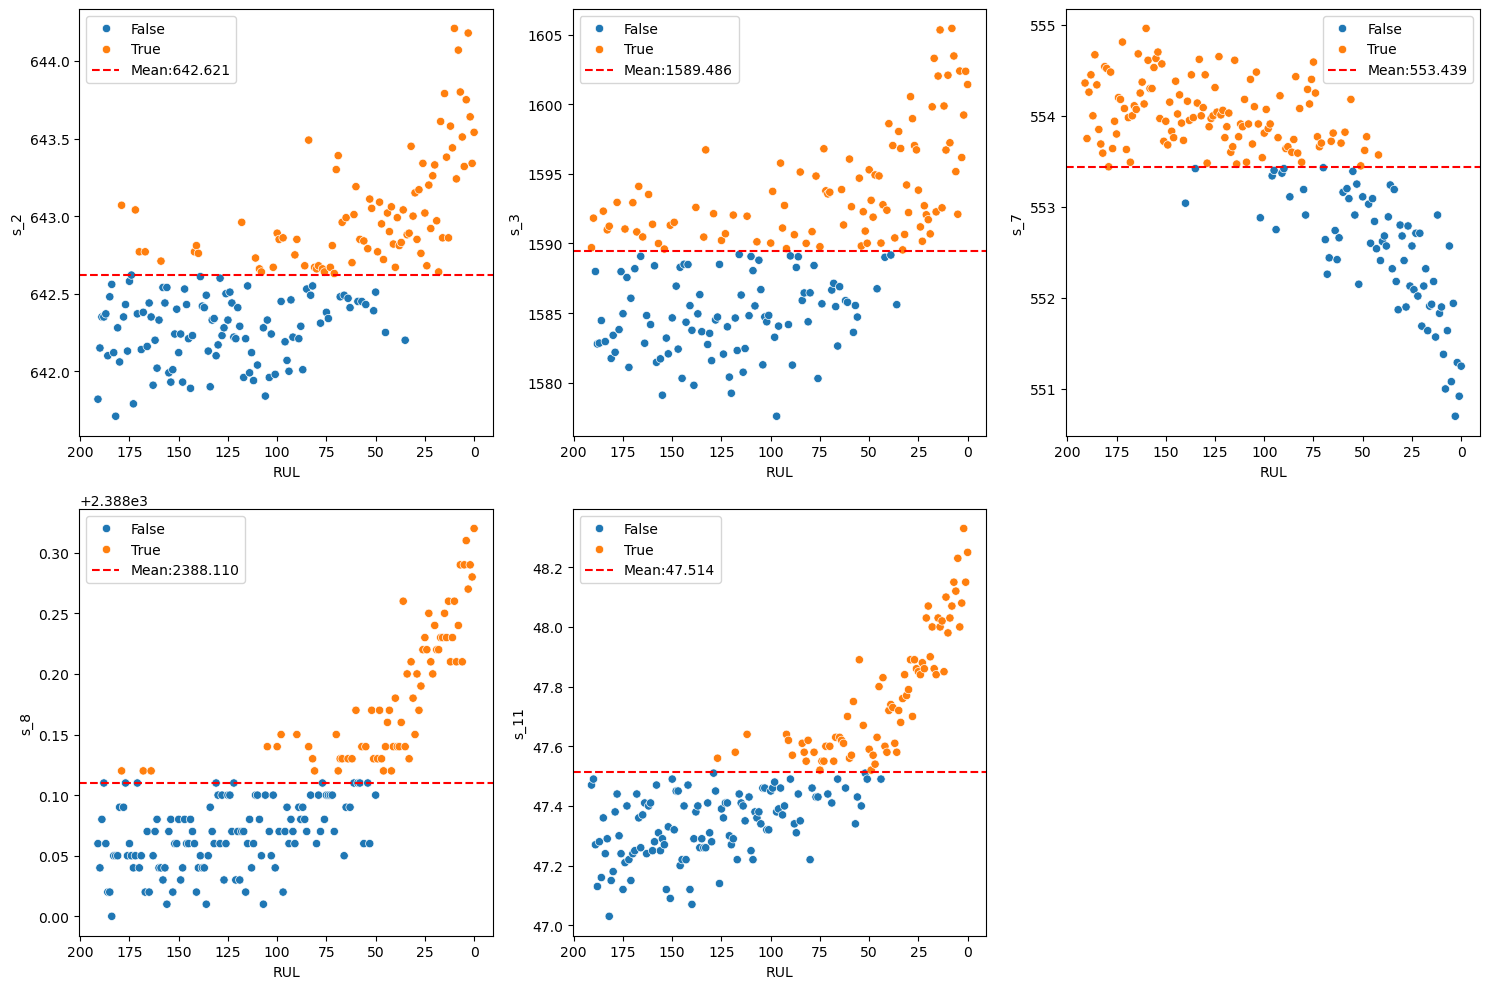

In [11]:
# List of sensor columns to visualize
sensors = ["s_2" , "s_3", "s_7", "s_8", "s_11"]

# Create a 2x3 grid of subplots (6 total axes)
# figsize controls the overall size of the figure
fig, axes = plt.subplots(2,3, figsize = (15,10))

# Flatten the 2D axes array into a 1D list
# This makes it easier to loop over and index
axes = axes.flatten()

# Loop over each sensor and its index
for i, s in enumerate(sensors):
    avg = unit_1[s].mean() # Compute the mean value of the current sensor for unit_1
    sns.scatterplot(data=unit_1, x='RUL', y=s, hue=(unit_1[s] > avg), ax=axes[i])
    axes[i].axhline(avg, color='red', linestyle='--', label=f'Mean:{avg:.3f}')
    axes[i].invert_xaxis()  # Invert the x-axis so RUL decreases from left to right
    axes[i].legend()

# If we created more subplots than sensors,
# remove the unused axes so the figure looks clean
if len(sensors) < len(axes):
    for a in range(len(sensors), len(axes)):
        fig.delaxes(axes[a])

plt.tight_layout()
plt.show()

### Graphing 5 engines

Looking at 5 engines over the course of their life cycles and will compare what s_11 is doing in  
that timeframe. Will then look into their RUL to see if there's any consistency with where the 
sensor begins to show us information of where the engine may start to become no longer useful anymore.

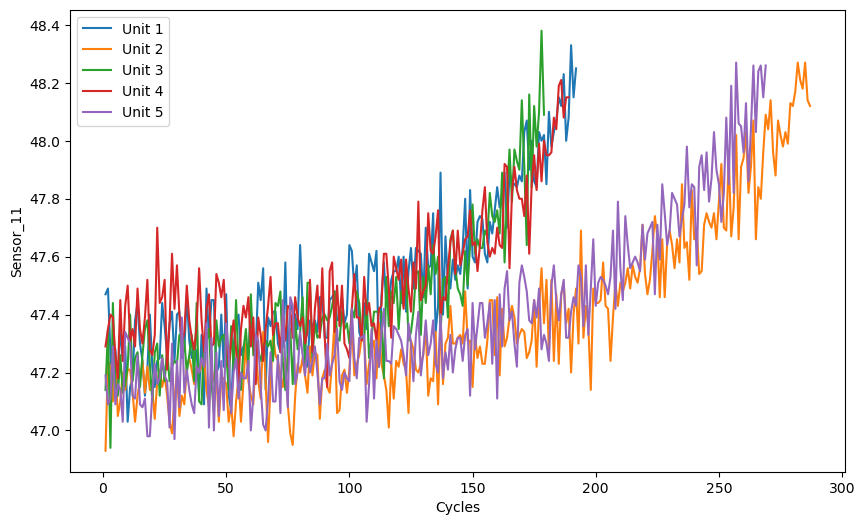

In [12]:
plt.figure(figsize=(10,6))
for i in range(1,6):
    unit_data = train[train['unit_num'] == i]
    plt.plot(unit_data['time_cycles'], unit_data['s_11'], label=f'Unit {i}')

plt.xlabel('Cycles')
plt.ylabel('Sensor_11')
plt.legend()
plt.show()

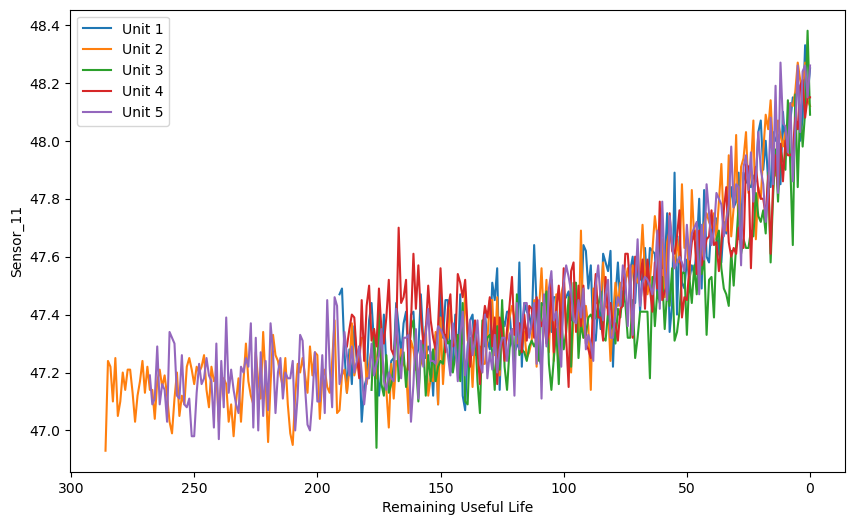

In [13]:
plt.figure(figsize=(10,6))
for i in range(1,6):
    unit_data = train[train['unit_num'] == i]
    plt.plot(unit_data['RUL'], unit_data['s_11'], label=f'Unit {i}')

plt.xlabel('Remaining Useful Life')
plt.ylabel('Sensor_11')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

### Checking the operational settings  
Checking the operational settings against the sensors to be sure that the settings are the way they are  
because the engines are actually degrading over time and not something the pilots of the engine are causing.

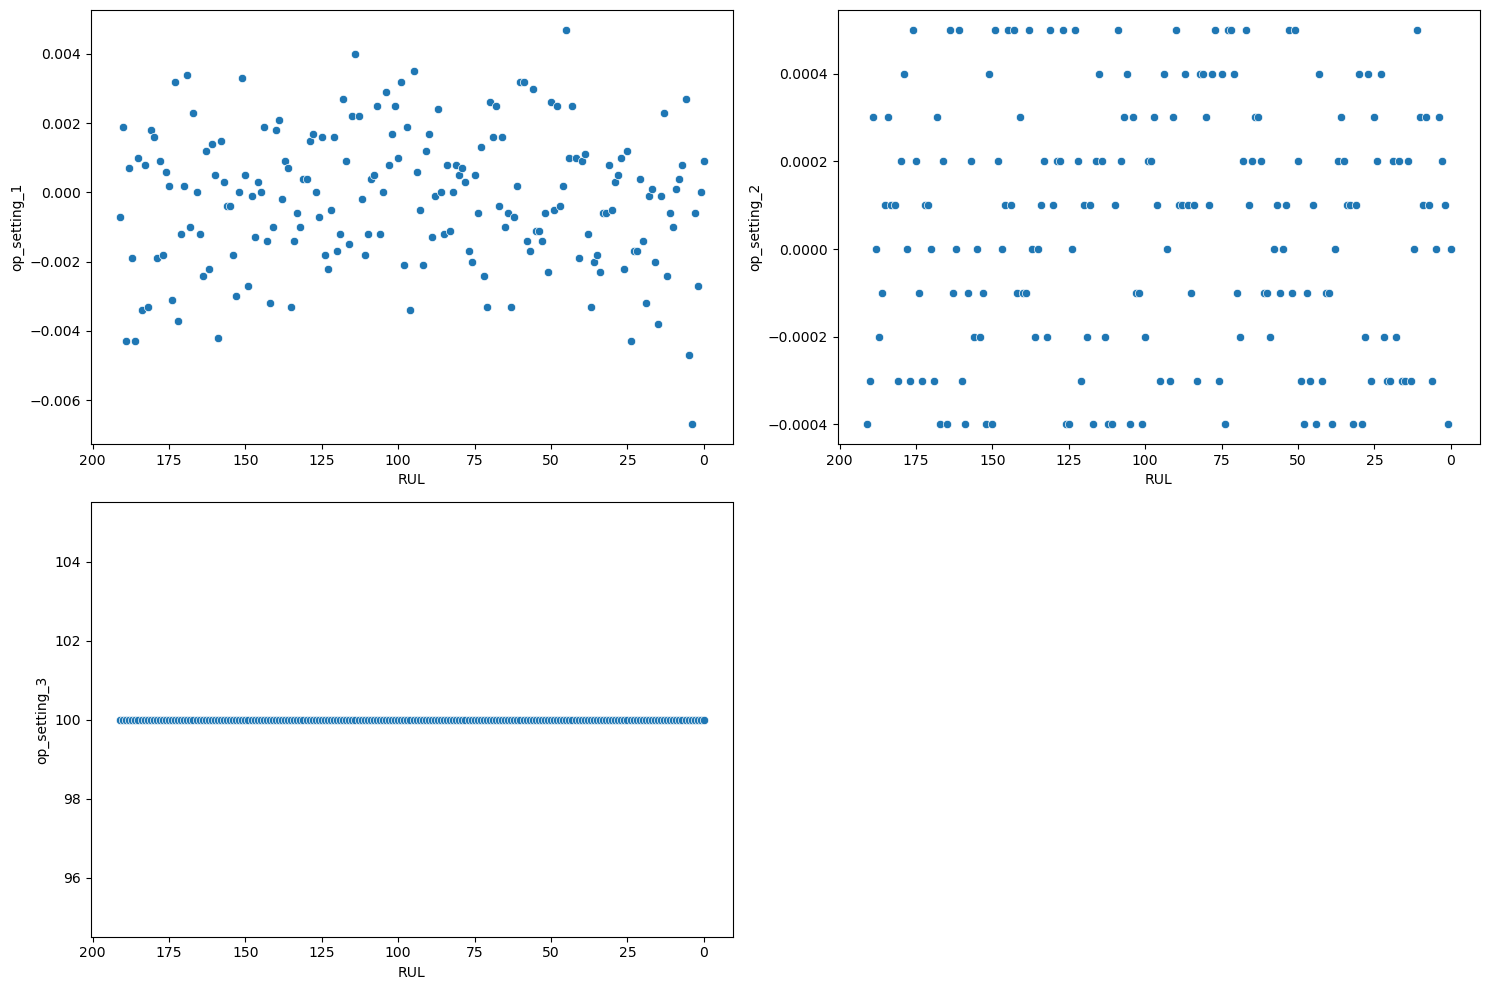

In [14]:
# Looking at engine 1
op_settings = ["op_setting_1" , "op_setting_2", "op_setting_3"]

# Create a 1x2 grid of subplots (2 total axes)
# figsize controls the overall size of the figure
fig, axes = plt.subplots(2,2, figsize = (15,10))
axes = axes.flatten()

for i, o in enumerate(op_settings):
    sns.scatterplot(data=unit_1, x='RUL', y=o, ax=axes[i])
    axes[i].invert_xaxis()  # Invert the x-axis so RUL decreases from left to right

if len(op_settings) < len(axes):
    for j in range(len(op_settings), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Seeing as there's either a clouded look to the data or a straight looking line across the axis, it's safe to assume that our  
data related to the sensors relaying info about the engines degration overtime is reliable and that it's not the pilots  
of the engine that are causing issues to the engine.

## Feature Engineering

In [15]:
# Window size is 15 since in the beginning the engines look to be consistently healthy
window_size = 15

train["s_11_smooth"] = train.groupby("unit_num")["s_11"].transform(lambda x: x.rolling(window=window_size).mean())
train["s_7_smooth"] = train.groupby("unit_num")["s_7"].transform(lambda x: x.rolling(window=window_size).mean())
train["s_8_smooth"] = train.groupby("unit_num")["s_8"].transform(lambda x: x.rolling(window=window_size).mean())

In [16]:
print(train[train['unit_num']==1][['unit_num', 'time_cycles', 's_11', 's_11_smooth']].head(25))

    unit_num  time_cycles   s_11  s_11_smooth
0          1            1  47.47          NaN
1          1            2  47.49          NaN
2          1            3  47.27          NaN
3          1            4  47.13          NaN
4          1            5  47.28          NaN
5          1            6  47.16          NaN
6          1            7  47.36          NaN
7          1            8  47.24          NaN
8          1            9  47.29          NaN
9          1           10  47.03          NaN
10         1           11  47.15          NaN
11         1           12  47.18          NaN
12         1           13  47.38          NaN
13         1           14  47.44          NaN
14         1           15  47.30    47.278000
15         1           16  47.24    47.262667
16         1           17  47.12    47.238000
17         1           18  47.21    47.234000
18         1           19  47.40    47.252000
19         1           20  47.22    47.248000
20         1           21  47.15  

In [17]:
train["s_11_slope"] = train.groupby("unit_num")["s_11_smooth"].diff()
train["s_7_slope"] = train.groupby("unit_num")["s_7_smooth"].diff()
train["s_8_slope"] = train.groupby("unit_num")["s_8_smooth"].diff()

print(train[train['unit_num']==1][['unit_num', 'time_cycles', 's_11', 's_11_slope', 's_7',
                                  's_7_slope']].head(25))

    unit_num  time_cycles   s_11  s_11_slope     s_7  s_7_slope
0          1            1  47.47         NaN  554.36        NaN
1          1            2  47.49         NaN  553.75        NaN
2          1            3  47.27         NaN  554.26        NaN
3          1            4  47.13         NaN  554.45        NaN
4          1            5  47.28         NaN  554.00        NaN
5          1            6  47.16         NaN  554.67        NaN
6          1            7  47.36         NaN  554.34        NaN
7          1            8  47.24         NaN  553.85        NaN
8          1            9  47.29         NaN  553.69        NaN
9          1           10  47.03         NaN  553.59        NaN
10         1           11  47.15         NaN  554.54        NaN
11         1           12  47.18         NaN  554.52        NaN
12         1           13  47.38         NaN  553.44        NaN
13         1           14  47.44         NaN  554.48        NaN
14         1           15  47.30        

In [18]:
unit_1 = train[train["unit_num"]==1]

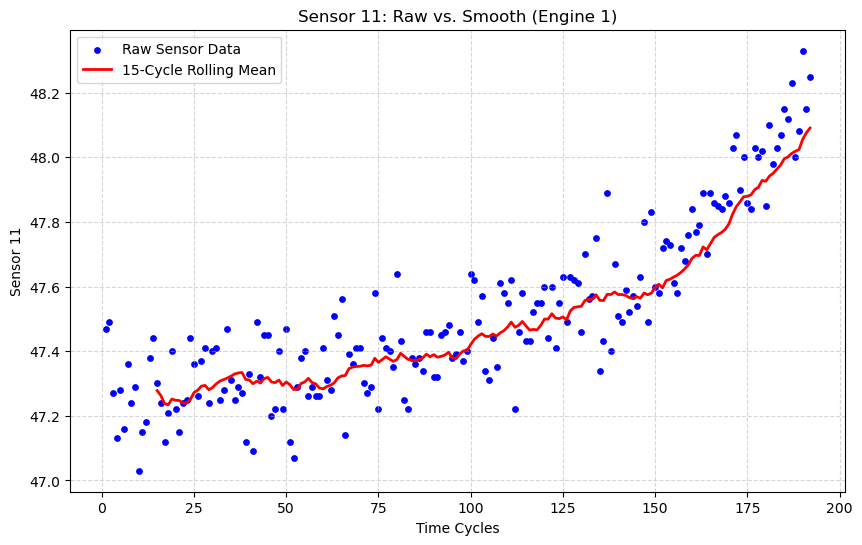

In [19]:
plt.figure(figsize=(10,6))

# Plotting the raw data
# s=15 just controls the size of the individual dots on the graph.
plt.scatter(unit_1['time_cycles'], unit_1['s_11'], color='blue', s=15, label="Raw Sensor Data")

# Plotting the smoothed data
plt.plot(unit_1['time_cycles'], unit_1["s_11_smooth"], color='red', linewidth=2, label="15-Cycle Rolling Mean")

plt.title("Sensor 11: Raw vs. Smooth (Engine 1)")
plt.xlabel("Time Cycles")
plt.ylabel("Sensor 11")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [20]:
features = ["s_7_smooth", "s_8_smooth", "s_11_smooth"]

target = "RUL"

# Dropping rows with NaN values which is the first 14 cycles
train_drop = train.dropna(subset=features)

x_train = train_drop[features]
y_train = train_drop[target]

print(f"Feature Shape: {x_train.shape}")
print(f"Target Shape: {y_train.shape}")

Feature Shape: (19231, 3)
Target Shape: (19231,)


In [21]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [22]:
# Making the model

model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)

results = model.fit(x_train, y_train)

print(results)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)


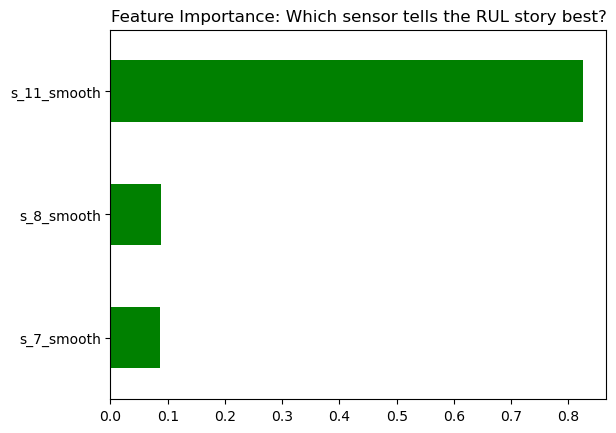

In [23]:
importance = pd.Series(model.feature_importances_, index=features)
importance.sort_values().plot(kind='barh', color='green')
plt.title("Feature Importance: Which sensor tells the RUL story best?")
plt.show()

In [24]:
# Putting the model to work

predicitions = model.predict(x_train)

mse = mean_squared_error(y_train, predicitions)

#root mean squared error
rmse = np.sqrt(mse)

print(f"On average, our prediction is off by about {rmse:.2f} cycles.")

On average, our prediction is off by about 36.72 cycles.


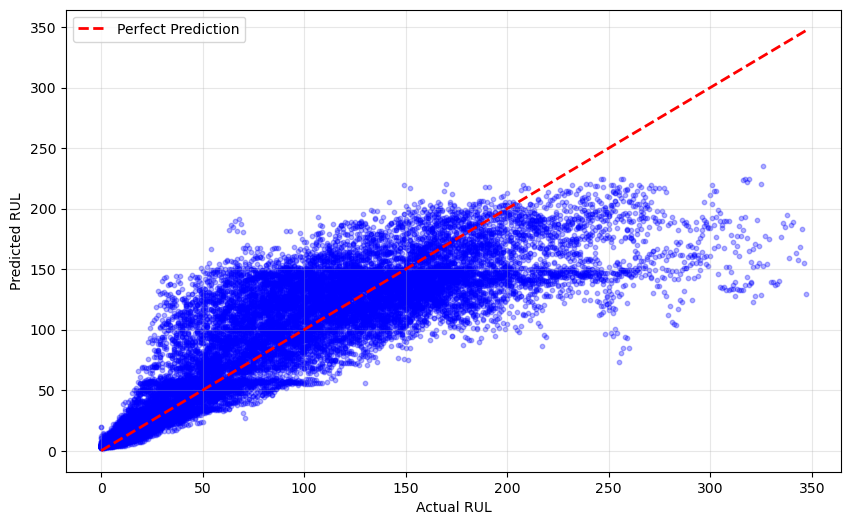

In [25]:
y_pred = model.predict(x_train)

plt.figure(figsize=(10,6))
plt.scatter(y_train, y_pred, alpha=0.3, color="blue", s=10)

max_val = int(y_train.max())
plt.plot([0,max_val], [0,max_val], color="red", linestyle='--', linewidth=2, label="Perfect Prediction")
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

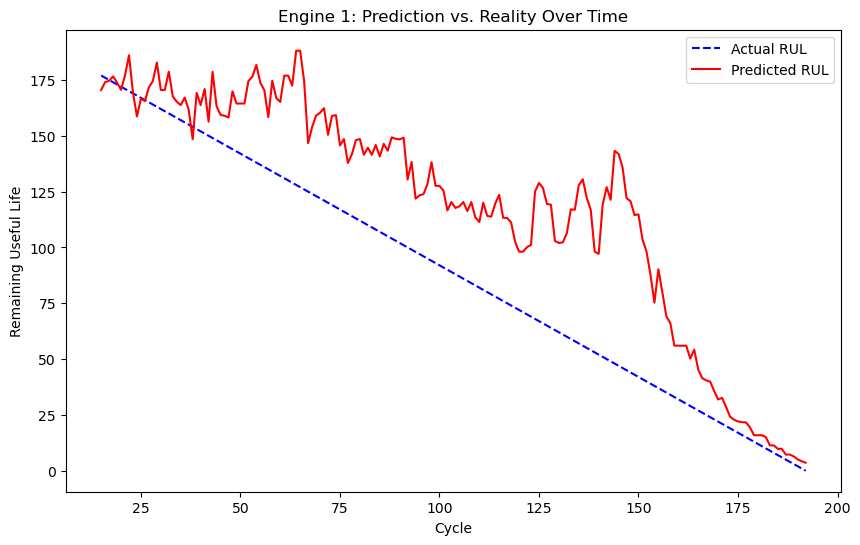

In [26]:
# More testing of the model

unit_data = train_drop[train_drop['unit_num']==1]

unit_preds = model.predict(unit_data[features])

plt.figure(figsize=(10,6))
plt.plot(unit_data['time_cycles'].values, unit_data['RUL'].values, label="Actual RUL", color="blue", linestyle='--')
plt.plot(unit_data['time_cycles'].values, unit_preds, label="Predicted RUL", color="red")

plt.title("Engine 1: Prediction vs. Reality Over Time")
plt.xlabel("Cycle")
plt.ylabel("Remaining Useful Life")
plt.legend()
plt.show()

## Importing the Test dataset

In [27]:
test = pd.read_csv('C:/Users/rgard/Nasa_Data/CMAPSSData/test_FD001.txt', sep='\\s+', header=None, names=col_names)

In [28]:
test.head()

,unit_num,time_cycles,op_setting_1,op_setting_2,op_setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


## Feature Engineering the Test Set

In [29]:

test["s_11_smooth"] = test.groupby("unit_num")["s_11"].transform(lambda x: x.rolling(window=window_size).mean())
test["s_7_smooth"] = test.groupby("unit_num")["s_7"].transform(lambda x: x.rolling(window=window_size).mean())
test["s_8_smooth"] = test.groupby("unit_num")["s_8"].transform(lambda x: x.rolling(window=window_size).mean())

In [30]:

test_last_cycles = test.groupby("unit_num").tail(1)

features = ["s_7_smooth", "s_8_smooth", "s_11_smooth"]
x_test = test_last_cycles[features].copy()
# ffil(Forward Fill): Replaces a missing value with the last observed valid value immediately preceding it in the data sequence.
# bfill(Backward Fill): Replaces a missing value with the first observed valid value immediately following it in the data sequence.
x_test = x_test.bfill().ffill()

y_pred_test = model.predict(x_test)

results = pd.DataFrame({"Engine_Unit": test_last_cycles['unit_num'].values,
                        "Predicted_RUL": y_pred_test.round(1)})

print(results.head())

   Engine_Unit  Predicted_RUL
0            1     172.000000
1            2     147.899994
2            3      65.199997
3            4     128.399994
4            5     120.300003


In [31]:

true_results = pd.read_csv('C:/Users/rgard/Nasa_Data/CMAPSSData/RUL_FD001.txt', header=None, names=['Actual_RUL'])

In [32]:
results["Actual_RUL"] = true_results["Actual_RUL"].values

final_rmse = np.sqrt(mean_squared_error(results["Actual_RUL"], results["Predicted_RUL"]))

print(f"Final RMSE: {final_rmse:.2f}")

print(results.head())

Final RMSE: 31.48
   Engine_Unit  Predicted_RUL  Actual_RUL
0            1     172.000000         112
1            2     147.899994          98
2            3      65.199997          69
3            4     128.399994          82
4            5     120.300003          91


## Adjusting the Model

In [33]:
model_adjust = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)

In [34]:
train_drop.loc[:,"RUL"] = train_drop["RUL"].clip(upper=125)
y_train = train_drop["RUL"]
model_adjust.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [35]:
mse = mean_squared_error(y_train, predicitions)
rmse = np.sqrt(mse)

print(f"On average, our prediction is off by about {rmse:.2f} cycles.")

On average, our prediction is off by about 31.62 cycles.


## Adjusted Model Results

In [36]:
y_pred_test = model_adjust.predict(x_test)

results = pd.DataFrame({"Engine_Unit": test_last_cycles['unit_num'].values,
                        "Predicted_RUL": y_pred_test.round(1)})

print(results.head())

   Engine_Unit  Predicted_RUL
0            1     117.300003
1            2     119.199997
2            3      65.099998
3            4     108.400002
4            5     105.000000


In [37]:
results["Actual_RUL"] = true_results["Actual_RUL"].values

final_rmse = np.sqrt(mean_squared_error(results["Actual_RUL"], results["Predicted_RUL"]))

print(f"Final RMSE: {final_rmse:.2f}")

print(results.head())

Final RMSE: 20.63
   Engine_Unit  Predicted_RUL  Actual_RUL
0            1     117.300003         112
1            2     119.199997          98
2            3      65.099998          69
3            4     108.400002          82
4            5     105.000000          91


## GridSearch

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid = {
    "max_depth":[3,4,5],
    "learning_rate":[0.01, 0.05, 0.1],
    "n_estimators": [100,200,300],
    "subsample":[0.8, 0.9]}

grid_search = GridSearchCV(
    estimator=XGBRegressor(objective="reg:squarederror",random_state=42),
    param_grid=param_grid,
    cv=10,
    scoring="neg_root_mean_squared_error", # Directly searching for the best RMSE
    verbose=1,
    n_jobs=-1) # This uses all the CPU cores to make it faster

In [40]:
grid_search.fit(x_train,y_train)

print(f"Winner Settings: {grid_search.best_params_}")
print(f"Best CV Score (RMSE): {-grid_search.best_score_:.2f}") # Adding the dash to -grid in case best score is
# negative. For example If best score is -20, then -(-20) becomes 20.

Fitting 10 folds for each of 54 candidates, totalling 540 fits
Winner Settings: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best CV Score (RMSE): 20.44


## GridSearch Adjusted Model

In [41]:
grid_model = grid_search.best_estimator_

y_pred_grid = grid_model.predict(x_test)

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
grid_rmse = np.sqrt(mean_squared_error(true_results, y_pred_grid))

print(f"GridSearch Optimized RMSE: {grid_rmse:.2f}")

GridSearch Optimized RMSE: 20.72


## Final Results

In [44]:
from sklearn.metrics import mean_absolute_error

In [45]:
final_results = pd.DataFrame({
    "Engine_Unit": test_last_cycles['unit_num'].values,
    "Predicted_RUL": y_pred_grid.round(1),
    "Actual_RUL": true_results["Actual_RUL"].values})

final_results['Error'] = final_results["Predicted_RUL"] - final_results["Actual_RUL"]

print(f"Final Test RMSE: {grid_rmse:.2f}")
print(final_results.head())

Final Test RMSE: 20.72
   Engine_Unit  Predicted_RUL  Actual_RUL      Error
0            1     117.099998         112   5.099998
1            2     116.400002          98  18.400002
2            3      62.500000          69  -6.500000
3            4     106.300003          82  24.300003
4            5     105.500000          91  14.500000


In [46]:
grid_mae = mean_absolute_error(final_results["Actual_RUL"], final_results["Predicted_RUL"])

print(f"On average, predictions are within {grid_mae:.2f} cycles of the truth.")

On average, predictions are within 15.70 cycles of the truth.


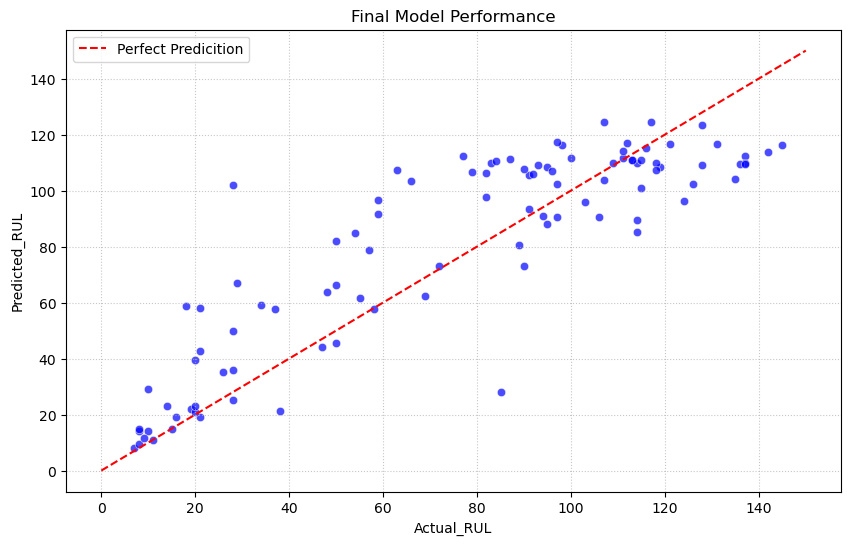

In [47]:
plt.figure(figsize=(10,6))

plt.plot([0,150], [0,150], color='red', linestyle='--', label='Perfect Predicition')

sns.scatterplot(data=final_results, x='Actual_RUL', y="Predicted_RUL", alpha=0.7, color='blue')

plt.title("Final Model Performance")
plt.xlabel("Actual_RUL")
plt.ylabel("Predicted_RUL")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()